In [54]:
# alpha^2 (y), L/Reff (x)
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
plt.style.use('../mplstyles/standard.mplstyle')

In [35]:
# You'll need to change this
# the fit data (alpha value comes from here)
fit_filename = "../imported-data/data_XueSofuaGAIATSet.csv"

In [36]:
# the L/Reff values
# don't change this
luminosity_filename = "../data/L_Reff_ratio.txt"

In [37]:
df_lum = pd.read_csv(luminosity_filename, sep="\t", skiprows=1)

In [38]:
df_lum.head()

,Galaxy,L/R sof
0,CamB_rotmod,0.061983
1,D564-8_rotmod,0.045833
2,D631-7_rotmod,0.160656
3,DDO154_rotmod,0.081538
4,DDO168_rotmod,0.148062


In [39]:
df_fit = pd.read_csv(fit_filename)

In [40]:
df_fit.head(5)

,Galaxy,chi_square,alpha,disk_scale,bulge_scale,phi_zero
0,UGCA442_rotmod,0.536458,261.579215,2.277352,1.000000,0.000005
1,NGC2841_rotmod,1.275381,1.404316,0.914366,1.101626,0.000007
2,UGC07232_rotmod,0.190685,1563.196966,0.819275,1.000000,0.000004
3,D564-8_rotmod,0.053269,4130.361393,1.211034,1.000000,0.000004
4,NGC0024_rotmod,0.657085,9.875502,1.388116,1.000000,0.000006


In [41]:
merged = df_lum.merge(df_fit, on="Galaxy")

In [45]:
# take logs for the fit
logx = np.log(merged["L/R sof"].values)
logy = np.log(merged["alpha"].values)

In [46]:
# linear regression: log y = m log x + b
slope, intercept, r_value, p_value, stderr = linregress(logx, logy)

k = slope
A = np.exp(intercept)

print("k (power-law exponent) =", k)
print("A (prefactor) =", A)
print("R^2 =", r_value**2)

k (power-law exponent) = -1.11461147647882
A (prefactor) = 93.23404731959509
R^2 = 0.8189991995475636


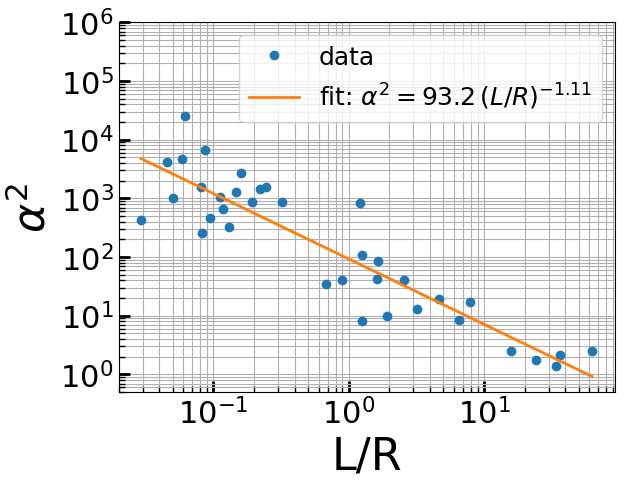

In [59]:
plt.loglog(merged["L/R sof"].values, merged["alpha"].values, 'o', label="data")

xx = np.linspace(min(merged["L/R sof"].values), max(merged["L/R sof"].values), 200)
yy = A * xx**k

plt.loglog(xx, yy, '-', 
           label=rf"fit: $\alpha^2 = {A:.3g}\,(L/R)^{{{k:.3g}}}$")

plt.xlabel("L/R")
plt.ylabel(r"$\alpha^2$")
plt.legend()
plt.grid(True, which="both")
#plt.xlim(10E-2,10E2)
plt.ylim(0.5,10E5)

plt.savefig("fit-analysis-plots/alpha-correlation-graph.png",dpi=300, bbox_inches="tight")

plt.show()